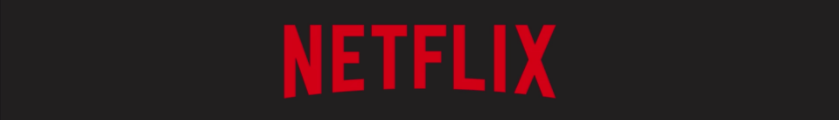

# Jupyter 4

# Análise dos Dados e Linguagem SQL

In [1]:
!pip install -q ipython-sql

In [2]:
import pandas as pd
import numpy as np
import tratamento_ausentes as ta
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('netflix_dfv3.csv', sep = ',')

In [4]:
# Criando o banco de dados vazio

bd = sqlite3.connect('database/dbnetflix.db')

In [5]:
# Atribuindo nosso dataframe ao banco de dados

df.to_sql('TB_netflix', bd)

In [6]:
# Carregando a extensão SQL

%load_ext sql

In [7]:
# Definindo o BD

%sql sqlite:///database/dbnetflix.db

<blockquote> Utilizando Consultas SQL </blockquote>

In [8]:
df.head(5)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,day_added,year_added,qtd_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,25,2021,0
1,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24,2021,2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021,TV-MA,0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,24,2021,1
3,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021,TV-MA,0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,24,2021,1
4,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,24,2021,2


# Quantos Filmes foram lançados nos Estados Unidos?

In [9]:
%%sql 

SELECT count(*) FROM TB_netflix 
Where country like '%United States%'
AND type = 'Movie'


 * sqlite:///database/dbnetflix.db
Done.


count(*)
2752


In [10]:
%%sql

SELECT count(*) FROM TB_netflix
WHERE country like '%United States%'
AND type = 'TV Show'

 * sqlite:///database/dbnetflix.db
Done.


count(*)
938


# Total geral de Movies e TV Shows

In [11]:
%%sql

SELECT count(*) FROM TB_netflix
WHERE type = 'TV Show'

 * sqlite:///database/dbnetflix.db
Done.


count(*)
2676


In [12]:
%%sql

SELECT count(*) FROM TB_netflix
WHERE type = 'Movie'

 * sqlite:///database/dbnetflix.db
Done.


count(*)
6131


# Quantos Filmes/Tv Shows foram adicionados  na plataforma no dia 25 de Setembro de 2020?

In [13]:
%%sql

SELECT COUNT(*) FROM TB_netflix
WHERE day_added = 25
AND month_added = 'September'
AND year_added = 2020


 * sqlite:///database/dbnetflix.db
Done.


COUNT(*)
6


# Quantos TV Shows com mais de 3 Temporadas, foram lançados na plataforma?

In [14]:
%%sql

SELECT COUNT(*) FROM TB_netflix
WHERE type = 'TV Show'
AND qtd_seasons >= 3

 * sqlite:///database/dbnetflix.db
Done.


COUNT(*)
458


# Do Total de filmes / tv shows, quantos estão listados como Documentários?

In [15]:
%%sql

SELECT COUNT(*) FROM TB_netflix
WHERE listed_in like '%Documentaries%'

 * sqlite:///database/dbnetflix.db
Done.


COUNT(*)
869


In [16]:
%%sql

SELECT * FROM TB_netflix
WHERE listed_in like '%Documentaries%'
limit 20

 * sqlite:///database/dbnetflix.db
Done.


index,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,day_added,year_added,qtd_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",September,25,2021,0
16,Movie,Europe's Most Dangerous Man: Otto Skorzeny in Spain,"Pedro de Echave García, Pablo Azorín Williams",Not Available,Not Available,2020,TV-MA,67,"Documentaries, International Movies","Declassified documents reveal the post-WWII life of Otto Skorzeny, a close Hitler ally who escaped to Spain and became an adviser to world presidents.",September,22,2021,0
45,Movie,My Heroes Were Cowboys,Tyler Greco,Not Available,Not Available,2021,PG,23,Documentaries,"Robin Wiltshire's painful childhood was rescued by Westerns. Now he lives on the frontier of his dreams, training the horses he loves for the big screen.",September,16,2021,0
68,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michael Wech",Michael Schumacher,Not Available,2021,TV-14,113,"Documentaries, International Movies, Sports Movies","Through exclusive interviews and archival footage, this documentary traces an intimate portrait of seven-time Formula 1 champion Michael Schumacher.",September,15,2021,0
88,Movie,Blood Brothers: Malcolm X & Muhammad Ali,Marcus Clarke,"Malcolm X, Muhammad Ali",Not Available,2021,PG-13,96,"Documentaries, Sports Movies","From a chance meeting to a tragic fallout, Malcolm X and Muhammad Ali's extraordinary bond cracks under the weight of distrust and shifting ideals.",September,9,2021,0
91,Movie,The Women and the Murderer,"Mona Achache, Patricia Tourancheau",Not Available,France,2021,TV-14,92,"Documentaries, International Movies",This documentary traces the capture of serial killer Guy Georges through the tireless work of two women: a police chief and a victim's mother.,September,9,2021,0
96,Movie,If I Leave Here Tomorrow: A Film About Lynyrd Skynyrd,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Collins, Leon Wilkeson, Bob Burns, Billy Powell, Ed King, Artimus Pyle, Steve Gaines, Johnny Van Zant",United States,2018,TV-MA,97,"Documentaries, Music & Musicals","Using interviews and archival footage, this documentary charts the story of the legendary Southern rockers with a focus on front man Ronnie Van Zant.",September,7,2021,0
101,Movie,Untold: Breaking Point,"Chapman Way, Maclain Way",Not Available,United States,2021,TV-MA,80,"Documentaries, Sports Movies","Under pressure to continue a winning tradition in American tennis, Mardy Fish faced mental health challenges that changed his life on and off the court.",September,7,2021,0
117,Movie,Final Account,Luke Holland,Not Available,"United Kingdom, United States",2021,PG-13,94,Documentaries,This documentary stitches together never-before-seen interviews with the last living generation of people who participated in Hitler's Third Reich.,September,2,2021,0
170,Movie,Rhyme & Reason,Peter Spirer,"Too $hort, B-Real, Kurtis Blow, Da Brat, Grandmaster Caz, Sean ""P. Diddy"" Combs, Chuck D., Desiree Densiti, Dr. Dre, E-40, MC Eiht, Heavy D, Lauryn Hill, Ice-T, Wyclef Jean, Ras Kass, KRS-One, L.V., Mack 10, Craig Mack, Method Man, Keith Murray, Nasir 'Nas' Jones, The Notorious B.I.G., Master P, Q-Tip, Raekwon, Redman, Senen Reyes, Busta Rhymes, RZA, DJ Scratch, Erick Sermon, Tupac Shakur, Adario Strange, Suave",United States,1997,R,89,"Documentaries, Music & Musicals","The world and culture of rap song topics such as race, violence, police, family and sex are examined by hip-hop performers from both coasts.",September,1,2021,0


# TOP 20 Diretores que possuem o maior número total de minutos, contando todos os filmes listados na plataforma

In [17]:
%%sql

SELECT director as Diretores, SUM(duration) as duracao_minutos FROM TB_netflix
WHERE type = 'Movie'
GROUP by director
HAVING duracao_minutos > 100
ORDER BY duracao_minutos desc
limit 20

 * sqlite:///database/dbnetflix.db
Done.


Diretores,duracao_minutos
Not Available,12741
Martin Scorsese,1731
Cathy Garcia-Molina,1537
Youssef Chahine,1482
Steven Spielberg,1468
Hidenori Inoue,1323
Suhas Kadav,1307
Rajiv Chilaka,1289
David Dhawan,1248
Ashutosh Gowariker,1165


# Top 10 Diretores que tiveram mais temporadas acumuladas baseado em seus TV Shows na plataforma

In [40]:
%%sql

SELECT director, SUM(qtd_seasons) as qtd_seasons_total FROM TB_netflix
WHERE type = 'TV Show'
GROUP by director
ORDER BY qtd_seasons_total desc
limit 10

 * sqlite:///database/dbnetflix.db
Done.


director,qtd_seasons_total
Not Available,4348
Phil Sgriccia,15
Rob Seidenglanz,9
Philippa Lowthorpe,9
Hayato Date,9
Andy Devonshire,9
Jay Chandrasekhar,8
James Bamford,8
Dan Forrer,8
Glen Winter,7


In [18]:
df.loc[(df.director == 'Phil Sgriccia')]

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,day_added,year_added,qtd_seasons
2423,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2019,TV-14,0,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",June,5,2020,15


# Série com o maior número de Temporadas

In [19]:
df.qtd_seasons.max()

17

In [20]:
%%sql

SELECT * FROM TB_netflix
where qtd_seasons = 17

 * sqlite:///database/dbnetflix.db
Done.


index,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,day_added,year_added,qtd_seasons
548,TV Show,Grey's Anatomy,Not Available,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Justin Chambers, Patrick Dempsey, Chandra Wilson, T.R. Knight, James Pickens Jr., Isaiah Washington, Sara Ramirez, Eric Dane, Chyler Leigh, Kate Walsh, Kevin McKidd, Jessica Capshaw",United States,2020,TV-14,0,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey finds herself caught up in personal and professional passions with fellow doctors at a Seattle hospital.,July,3,2021,17


> Observe que o diretor de Grey's Anatomy não está disponível nos dados, ou seja, caso houvesse diretor ele se tornaria o diretor com mais temporadas em um TV Show na análise anterior

In [21]:
df.loc[df.director == 'Not Available']

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,day_added,year_added,qtd_seasons
1,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24,2021,2
3,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021,TV-MA,0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,24,2021,1
4,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,24,2021,2
10,TV Show,"Vendetta: Truth, Lies and The Mafia",Not Available,Not Available,Not Available,2021,TV-MA,0,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",September,24,2021,1
14,TV Show,Crime Stories: India Detectives,Not Available,Not Available,Not Available,2021,TV-MA,0,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...,September,22,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,TV Show,Yu-Gi-Oh! Arc-V,Not Available,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2015,TV-Y7,0,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,May,1,2018,2
8796,TV Show,Yunus Emre,Not Available,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2016,TV-PG,0,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",January,17,2017,2
8797,TV Show,Zak Storm,Not Available,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2016,TV-Y7,0,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,September,13,2018,3
8800,TV Show,Zindagi Gulzar Hai,Not Available,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2012,TV-PG,0,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",December,15,2016,1


# Exibindo Graficamente alguns insights

## Movies VS TV Shows

In [22]:
len(df.loc[(df['type'] == 'Movie')])

6131

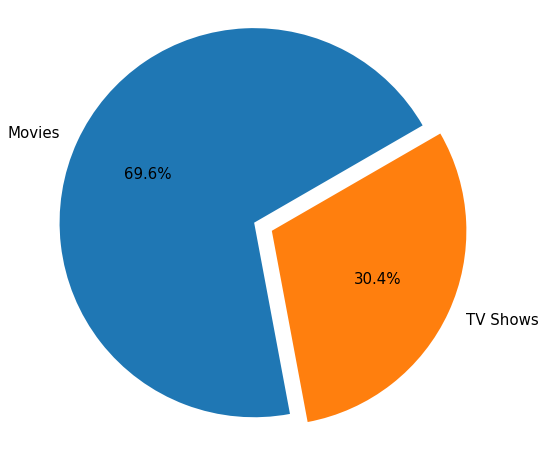

In [42]:

labels = 'Movies', 'TV Shows' 
movies = len(df.loc[(df['type'] == 'Movie')]) # Contagem dos valores totais de movies do dataset
tvshows = len(df.loc[(df['type'] == 'TV Show')]) #  Contagem dos valores totais de tv shows do dataset
sizes = [movies,tvshows] # lista com os 2 valores
explode = (0, 0.1)  # quebra de fatia de 0.1 na segunda fatia(tvshows)


fig1, ax1 = plt.subplots(figsize = [9,8])
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30, textprops={'fontsize': 15}) # autopct para mostrar o valor em % 
ax1.axis('equal')  # Ajusta a escala para que o circulo não se deforme : 
plt.savefig('imagens/pie_moviesVStvshows.png')
plt.show() # exibe o gráfico

# Quantidade de Movies e TV Shows adicionados por ano

In [24]:
df.year_added.value_counts().sort_index(ascending = False)

9999      10
2021    1498
2020    1879
2019    2016
2018    1649
2017    1188
2016     429
2015      82
2014      24
2013      11
2012       3
2011      13
2010       1
2009       2
2008       2
Name: year_added, dtype: int64

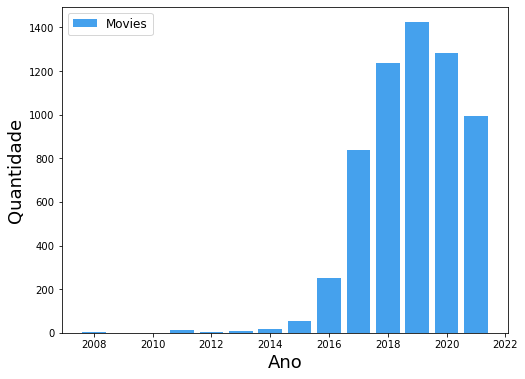

In [43]:
df_movies = df.loc[(df['type'] == 'Movie')] 
movie_data = df_movies.year_added.unique() #
movie_data.sort # modificando para ordem crescente
movie_qtd = df_movies.year_added.value_counts().sort_index(ascending = False)




plt.figure(figsize=[8,6])
plt.bar(movie_data,movie_qtd, label='Movies', color = '#45A1ED')
plt.xlabel('Ano', fontsize=18)
plt.ylabel('Quantidade', fontsize=18)
plt.legend(loc = 'upper left', fontsize=12)
plt.savefig('imagens/bar_moviesVSyear.png')
plt.show()

In [26]:
# É necessário modificar 10 linhas do dataset que contém o valor de year_added 9999 que era originalmente nulo.
# Essa transformação é necessária para que a escala X do gráfico gerado não seja por exemplo de 2008 até 9999
# impactando diretamente no gráfico.
# Nesse caso pode-se tanto dropar as 10 linhas por não ser uma grande quantidade de dados, quanto substituir por
# uma métrica, no caso, a moda (o valor que mais aparece no dataset para essa variável)

In [27]:
# O valor que mais aparece é 2019
df.year_added.value_counts()

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
9999      10
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

In [28]:
# Criando um dataset apenas com os TV Shows, pois as 10 linhas que serão modificadas pertencem apenas à essa categoria.
df_tvshows = df.loc[(df['type'] == 'TV Show')]

In [29]:
# Desta vez, o valor que mais aparece é 2020
df_tvshows.year_added.value_counts()

2020    595
2019    592
2021    505
2018    412
2017    349
2016    176
2015     26
9999     10
2014      5
2013      5
2008      1
Name: year_added, dtype: int64

In [30]:
# Substituindo os valores 9999 pela moda.

df['year_added'] = df['year_added'].replace(9999, 2020)

In [31]:
df.year_added.value_counts()

2019    2016
2020    1889
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

In [32]:
# Fazendo o mesmo com a coluna day_added

df_tvshows.day_added.value_counts()

1     522
15    228
30     91
31     88
2      86
22     80
10     80
20     80
14     77
19     75
16     74
8      72
17     71
6      69
18     67
27     66
5      63
7      63
23     60
21     60
4      59
12     59
24     57
25     57
28     56
26     54
9      54
13     53
3      52
11     49
29     44
99     10
Name: day_added, dtype: int64

In [33]:
df['day_added'] = df['day_added'].replace(99,1)

In [34]:
df.day_added.value_counts()

1     2222
15     687
2      325
16     289
31     274
20     249
19     243
5      231
22     230
10     214
30     210
6      210
18     207
26     206
8      201
14     198
25     197
27     195
7      194
21     193
28     190
23     184
12     181
17     180
4      175
13     175
24     159
3      151
11     149
9      147
29     141
Name: day_added, dtype: int64

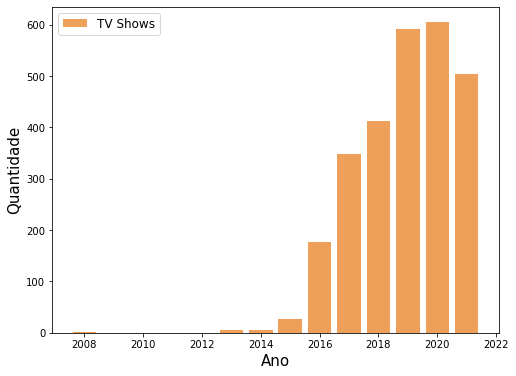

In [45]:
df_tvshows = df.loc[(df['type'] == 'TV Show')]
tvshow_data = df_tvshows.year_added.unique()
tvshow_data.sort # modificando para ordem crescente
tvshow_qtd = df_tvshows.year_added.value_counts().sort_index(ascending = False)



plt.figure(figsize=[8,6])
plt.bar(tvshow_data,tvshow_qtd, label='TV Shows', color = '#EE9F5A')
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.legend(loc = 'upper left', fontsize = 12)
plt.savefig('imagens/bar_tvshowsVSyear.png')
plt.show()

In [36]:
df_tvshows.year_added.value_counts()

2020    605
2019    592
2021    505
2018    412
2017    349
2016    176
2015     26
2014      5
2013      5
2008      1
Name: year_added, dtype: int64

# Exibindo os gráficos novamente

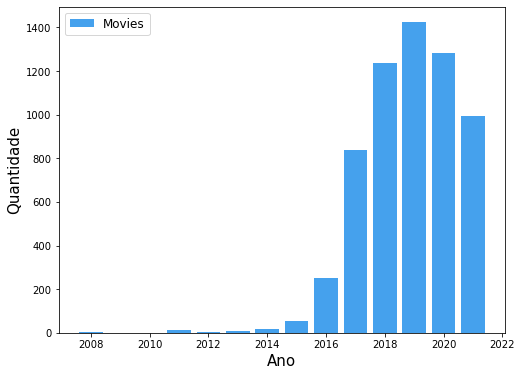

In [37]:
# Exibindo novamente


plt.figure(figsize=[8,6])
plt.bar(movie_data,movie_qtd, label='Movies', color = '#45A1ED')
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Quantidade', fontsize=15)
plt.legend(loc = 'upper left', fontsize=12)
plt.show()

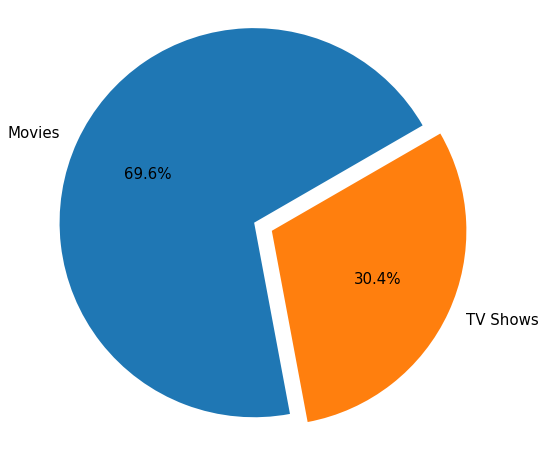

In [38]:
labels = 'Movies', 'TV Shows' 
movies = len(df.loc[(df['type'] == 'Movie')]) # Contagem dos valores totais de movies do dataset
tvshows = len(df.loc[(df['type'] == 'TV Show')]) #  Contagem dos valores totais de tv shows do dataset
sizes = [movies,tvshows] # lista com os 2 valores
explode = (0, 0.1)  # quebra de fatia de 0.1 na segunda fatia(tvshows)


fig1, ax1 = plt.subplots(figsize = [9,8])
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30, textprops={'fontsize': 15}) # autopct para mostrar o valor em % 
ax1.axis('equal')  # Ajusta a escala para que o circulo não se deforme : 
plt.show() # exibe o gráfico

In [39]:
# Salvando o dataframe
df.to_csv('netflix_dfv4.csv', index = False)

# Desta forma, podemos afirmar que:

<blockquote> A Quantidade de Filmes na plataforma representa 69.6% em relação ao total de séries, que representa 30.4%  </blockquote>
<blockquote> 2016 à 2021 foi o período onde foram adicionados mais filmes na plataforma, sendo 2019 o ano de maior destaque </blockquote>
<blockquote> 2020 Houve o maior número de adição de Séries na plataforma </blockquote>
<blockquote> Nos Estados Unidos, foram lançados 2752 Filmes e 938 Séries, de um total de 6131 Filmes e 2676 Séries </blockquote>
<blockquote> 869 Filmes estão listados na categoria Documentários  </blockquote>
<blockquote> 458 Séries possuem 3 ou mais temporadas </blockquote>
<blockquote> Martin Scorsese é o diretor que possui o maior número de minutos totais em filmes na plataforma (1731 minutos totais </blockquote>
<blockquote> Phil Sgriccia é o diretor que possui o maior número de temporadas totais em séries na plataforma (15 temporadas) </blockquote>
<blockquote> A série que mais possuí temporadas é Gray's Anatomy (17) </blockquote>
<blockquote> Utilizando SQL e Python, podemos gerar ótimas análises para tomada de decisão </blockquote>

<blockquote> Este é um projeto para demonstrar habilidades de análise com o objetivo de ingressar no mercado de trabalho como um analista Jr.</blockquote>

<blockquote> Obrigado por ler até aqui 8)  .</blockquote>

> OBS: o Jupyter " Correcao_Campos_Import_PowerBI " segue com alterações para que os dados sejam levados ao power bi sem inconsistências 